# MLR (Multiple Linear Regression)

In [1]:
# import libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [150]:
dataset = pd.read_csv("./Data/car_price_prediction_.csv")

df = dataset.copy()

In [151]:
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [152]:
df.drop(["Car ID"], inplace=True, axis=1)

In [153]:
# Extracting the dependent and independent variables
x = df.iloc[:, df.columns != df.columns[-2]].values 
y = df.iloc[:,7].values

In [154]:
print(x[0])

['Tesla' 2016 2.3 'Petrol' 'Manual' 114832 'New' 'Model X']


In [155]:
print(x[:, 7])

['Model X' '5 Series' 'A4' ... 'Fiesta' 'Q5' 'RAV4']


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

original_columns = df.columns[:-2].tolist() + df.columns[-1:].tolist()
categorical_cols = [0, 3, 4, 6, 7]
for col in categorical_cols:
	labelencoder_x = LabelEncoder()
	x[:, col] = labelencoder_x.fit_transform(x[:, col])

column_transformer = ColumnTransformer(
	[('encoder', OneHotEncoder(drop='first'), categorical_cols)],
	remainder='passthrough'
)
x = column_transformer.fit_transform(x)
x = x.toarray()

print(x.shape)

(2500, 42)


In [159]:
# Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [160]:
# Fitting the model to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [161]:
# Predicting the test set results
y_pred = regressor.predict(x_test)

In [162]:
y_pred[0]

np.float64(51328.09095485695)

In [163]:
y_test[0]

np.float64(19993.56)

In [164]:
print("Train Score: ", regressor.score(x_train, y_train))
print("Test Score: ", regressor.score(x_test, y_test))

Train Score:  0.020816801396944973
Test Score:  -0.023928508328805886


# Polynimial Regression

Train MSE: 567076121.0280883
Test MSE: 1173230535.0036798
Train R2: 0.22497783367893476
Test R2: -0.4719731764424919


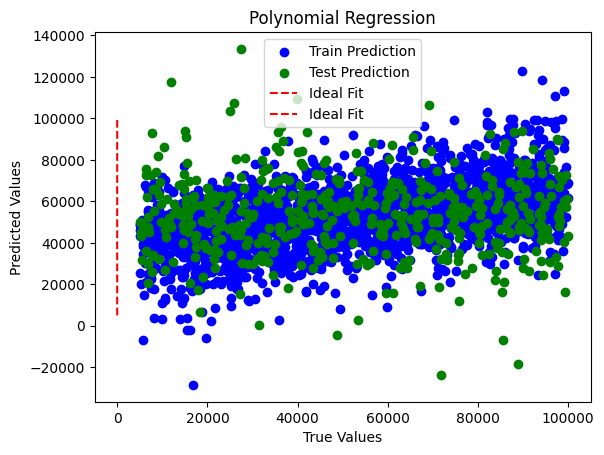

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures

poly_regs = PolynomialFeatures(degree=4)
x_poly_train = poly_regs.fit_transform(x_train)
x_poly_test = poly_regs.transform(x_test)

poly_reg_model = LinearRegression()
poly_reg_model.fit(x_poly_train, y_train)

y_train_pred = poly_reg_model.predict(x_poly_train)
y_test_pred = poly_reg_model.predict(x_poly_test)

print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2:", r2_score(y_test, y_test_pred))

plt.scatter(y_train, y_train_pred, color="blue", label="Train Prediction")
plt.scatter(y_test, y_test_pred, color="green", label='Test Prediction')
plt.plot(min(y), max(y), [min(y), max(y)], color='red', linestyle="--", label='Ideal Fit')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Polynomial Regression")
plt.show()

# XGB Regressor 

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)


params = {
    "objective": "reg:squarederror",  
    "max_depth": 6,  
    "learning_rate": 0.1,  
    "n_estimators": 100, 
    "eval_metric": "rmse",   
}

model = xgb.train(params, dtrain, num_boost_round=100)

e:\Workshop\Code\Godhuli\car_price_prediction\envAI\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:36:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
model = xgb.train(params, dtrain, num_boost_round=100)

y_train_pred_x = model.predict(dtrain)
y_test_pred_x = model.predict(dtest)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_x))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_x))

train_r2 = r2_score(y_train, y_train_pred_x)
test_r2 = r2_score(y_test, y_test_pred_x)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R²: {train_r2}")
print(f"Test R²: {test_r2}")

Train RMSE: 17202.578421979215
Test RMSE: 30025.21821908842
Train R²: 0.5955546406763963
Test R²: -0.1310684369729529


e:\Workshop\Code\Godhuli\car_price_prediction\envAI\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:36:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
